# **Part A**

In [1]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from scipy import stats

In [2]:
# Load the test data
test_df = pd.read_csv('CE802_P2_Data.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

# Data analysis

In [3]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   int64  
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   int64  
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     500 non-null    float64
 20  Class   1000 non-null   bool   
dtypes: bool(1), float64(18), int64(2)
memo

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   int64  
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   int64  
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     500 non-null    float64
dtypes: float64(18), int64(2)
memory usage: 156.4 KB


In [5]:
test_data.isnull()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [6]:
test_data.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20    500
dtype: int64

<Axes: >

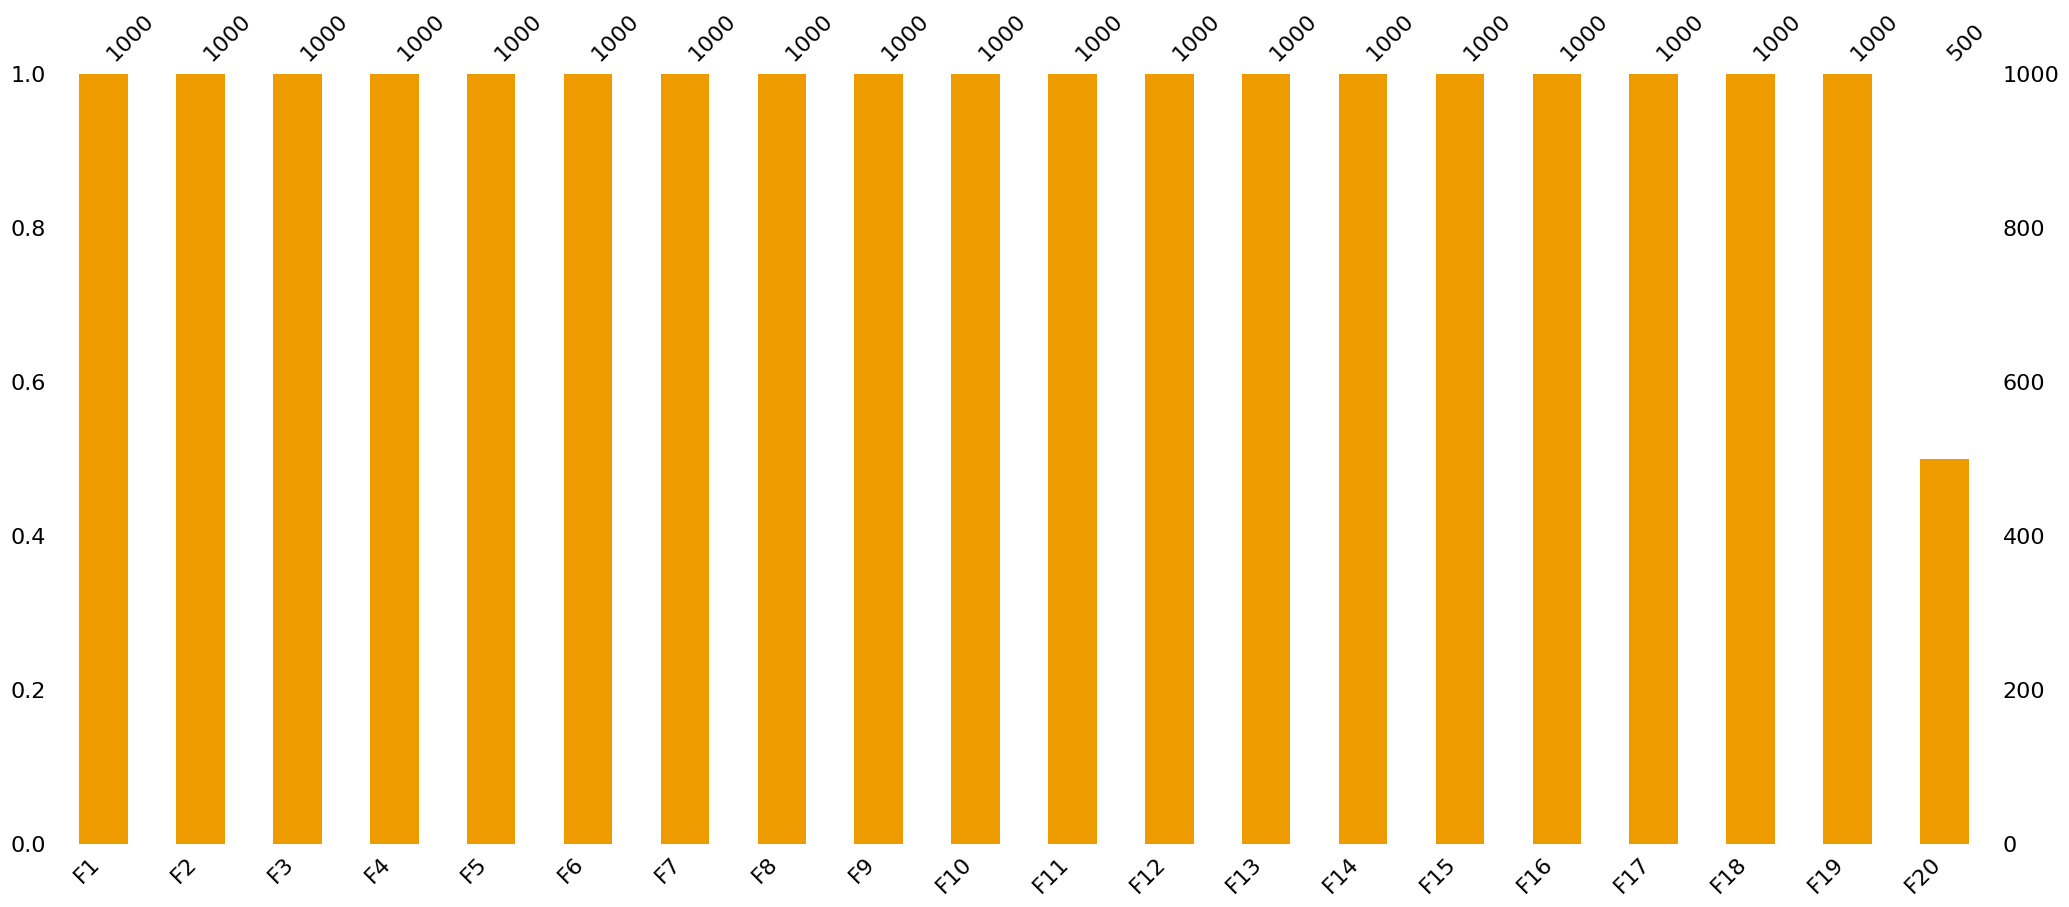

In [7]:
msno.bar(test_data,color = '#ee9b00')

<Axes: >

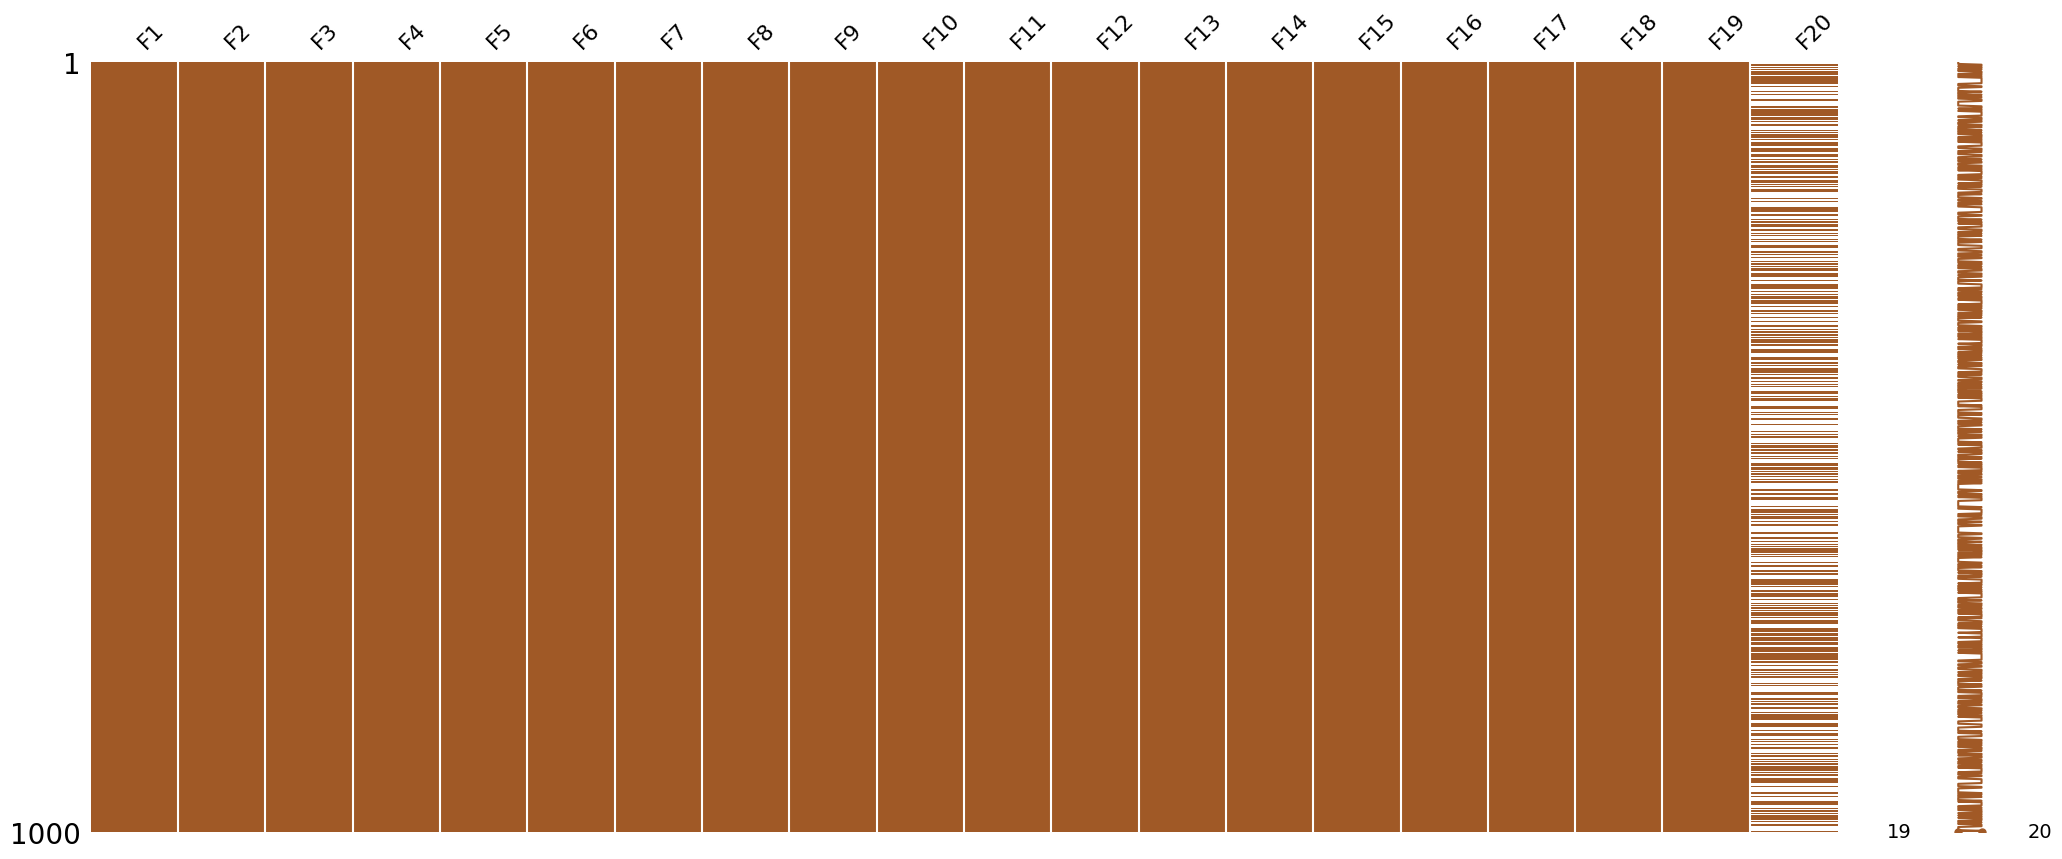

In [8]:
msno.matrix(test_data, color = (0.63, 0.35, 0.150))

In [9]:
test_data.corr(method = "pearson")

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
F1,1.000000,-0.001481,0.043066,0.009438,-0.003345,0.018811,0.040049,-0.014832,-0.018222,-0.011183,0.029807,0.015329,-0.287894,-0.021865,0.003312,-0.014486,0.092579,-0.023085,-0.008624,0.036037
F2,-0.001481,1.000000,-0.012867,-0.236772,0.027001,0.033943,0.001082,-0.063753,0.020217,0.027008,-0.002111,-0.011520,0.006406,-0.091842,-0.000217,-0.053769,0.045806,0.041286,0.037088,0.087621
F3,0.043066,-0.012867,1.000000,-0.011496,-0.016127,-0.018403,0.040851,0.036978,-0.007382,-0.000995,0.014355,0.014457,0.019447,0.023503,0.013230,0.010850,-0.033731,-0.030457,-0.002559,-0.083668
F4,0.009438,-0.236772,-0.011496,1.000000,-0.052302,0.000484,-0.007325,-0.031391,0.003868,0.005760,0.014594,0.059413,0.122382,0.003971,-0.003992,-0.006837,-0.006606,-0.028827,0.010592,0.058772
F5,-0.003345,0.027001,-0.016127,-0.052302,1.000000,0.011350,-0.011213,0.060880,-0.012625,-0.022825,-0.020058,-0.070234,-0.047216,0.085860,0.040642,0.026561,-0.020582,0.064833,-0.042076,0.111302
F6,0.018811,0.033943,-0.018403,0.000484,0.011350,1.000000,0.004519,-0.044801,0.012361,0.213338,-0.037730,-0.034931,-0.123040,0.050463,-0.004537,-0.022679,-0.012279,0.007732,0.238497,-0.111333
F7,0.040049,0.001082,0.040851,-0.007325,-0.011213,0.004519,1.000000,0.018169,0.006362,0.009086,0.008111,0.075142,-0.043781,-0.005987,0.026755,0.044135,0.043627,-0.013948,0.005228,-0.082714
F8,-0.014832,-0.063753,0.036978,-0.031391,0.060880,-0.044801,0.018169,1.000000,0.020361,-0.041041,-0.002052,0.050582,-0.296979,0.021028,-0.037528,-0.040083,0.021133,-0.000216,-0.254483,-0.005108
F9,-0.018222,0.020217,-0.007382,0.003868,-0.012625,0.012361,0.006362,0.020361,1.000000,-0.042713,-0.049179,0.035314,-0.001953,-0.019388,-0.014276,-0.005679,0.018965,0.074935,0.024747,0.031568
F10,-0.011183,0.027008,-0.000995,0.005760,-0.022825,0.213338,0.009086,-0.041041,-0.042713,1.000000,0.045470,-0.068430,0.042462,0.052393,-0.042789,0.055473,-0.037891,0.048212,-0.000167,-0.070592


Checking outliers


Check Data skewness using Bar chart 



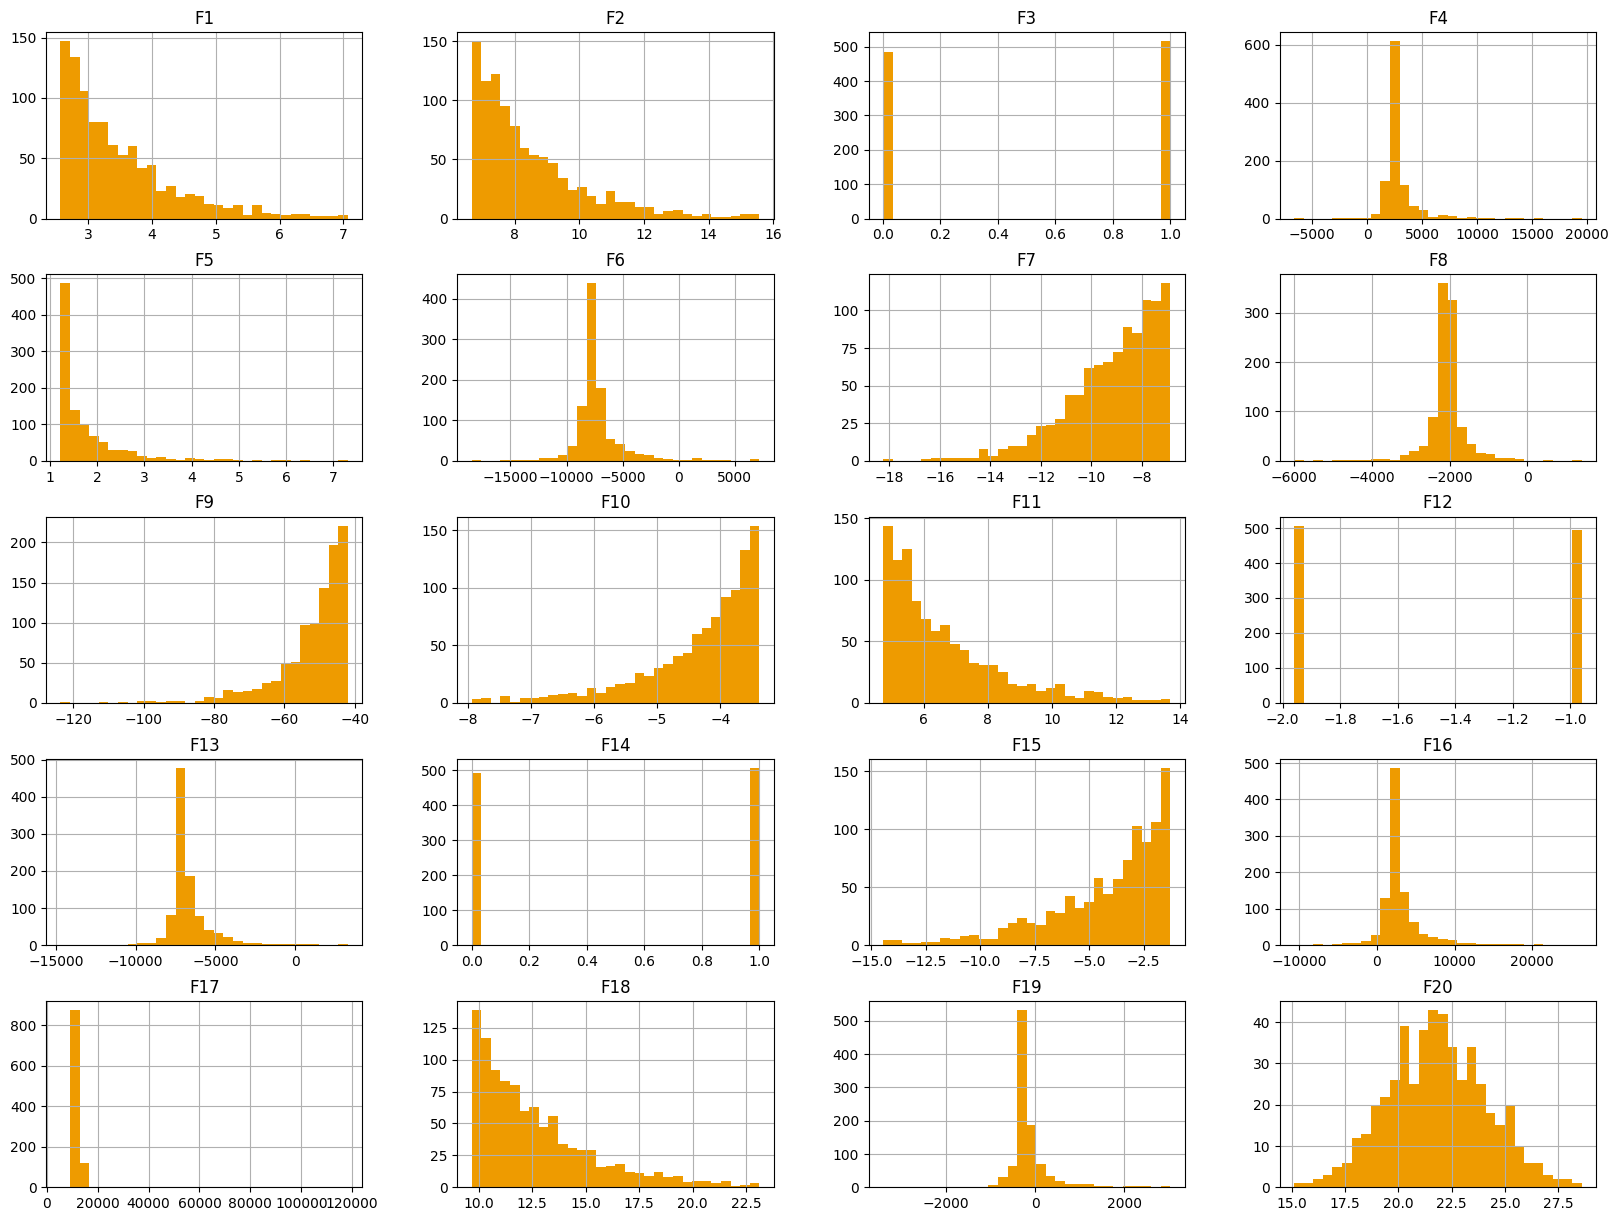

<Figure size 640x480 with 0 Axes>

In [10]:
print('Check Data skewness using Bar chart \n')
test_data.hist(bins=30, figsize=(20, 15),color='#ee9b00')
plt.figure()
plt.show()   

<Axes: >

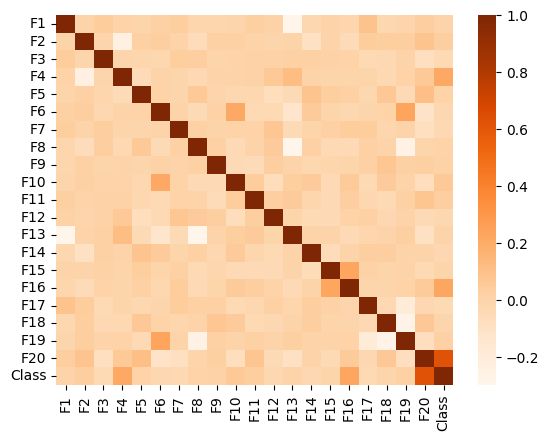

In [11]:
# Compute the correlation matrix
corr_matrix = test_df.corr()
# Plot a heatmap of the correlation matrix using Seaborn
sns.heatmap(corr_matrix, cmap='Oranges')

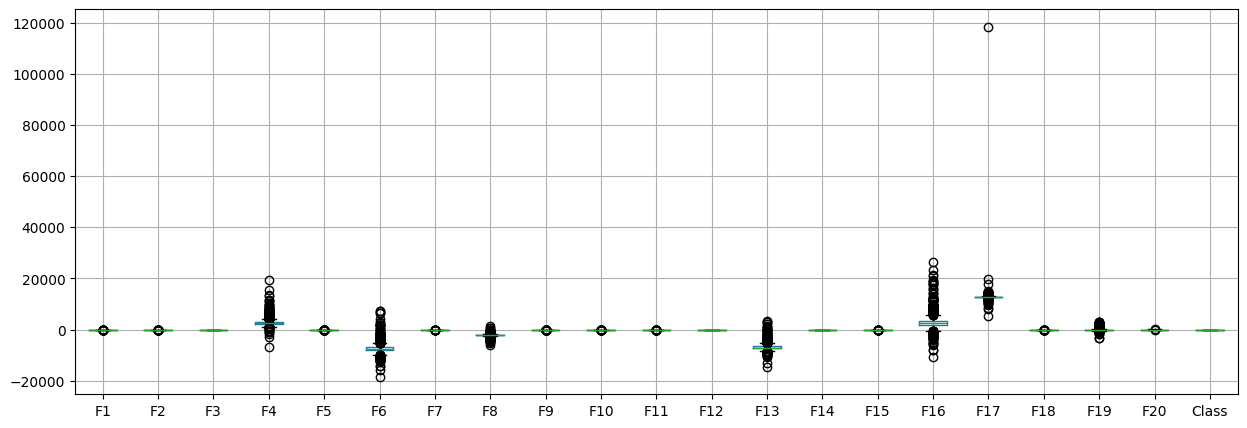

In [12]:
  # Detect outliers using boxplot
# self.space()  
fig, ax = plt.subplots(figsize=(15,5)) 
# print(start+'Outlier detection using Box plot'+end+'\n'.center(110))
test_df.boxplot()
plt.show()
    
plt.show()   

In [13]:
test_df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,3.484358,8.460027,0.516000,2818.788916,1.753968,-7264.855469,-9.151815,-2081.014585,-52.012299,-4.318608,6.635745,-1.467000,-6635.307898,0.508000,-4.185798,3036.192399,12929.041422,12.632875,-137.867215,21.840200
std,0.869678,1.706913,0.499994,1587.054314,0.765717,2108.672583,1.819802,511.582397,10.285697,0.901204,1.805525,0.500201,1494.941683,0.500186,2.699756,3111.533532,3376.459608,2.708330,493.077434,2.311671
min,2.562220,6.662580,0.000000,-6622.740000,1.230002,-18454.980000,-18.252000,-6005.170000,-123.640000,-7.935000,4.724400,-1.960000,-14719.700000,0.000000,-14.466000,-10635.900000,5396.160000,9.666360,-3419.600000,15.120000
25%,2.833325,7.198000,0.000000,2203.710000,1.278987,-8108.212500,-10.157250,-2215.070000,-54.812500,-4.687000,5.292950,-1.960000,-7266.006500,0.000000,-5.634750,1835.760000,12794.090000,10.552350,-311.682500,20.240000
50%,3.229050,7.917500,1.000000,2460.795000,1.448400,-7679.910000,-8.737050,-2070.058500,-48.942000,-4.037250,6.067400,-1.960000,-7012.600000,1.000000,-3.314400,2416.500000,12831.722000,11.796750,-245.540000,21.800000
75%,3.869500,9.190000,1.000000,2926.260000,1.943675,-6984.855000,-7.700400,-1945.470000,-45.052000,-3.641825,7.428500,-0.960000,-6473.600000,1.000000,-2.080725,3376.725000,12870.380000,13.870500,-110.925000,23.390000
max,7.075000,15.566000,1.000000,19513.260000,7.309000,7180.020000,-6.870168,1398.830000,-41.862328,-3.382990,13.704000,-0.960000,3326.300000,1.000000,-1.264140,26354.100000,118370.160000,23.124000,3042.400000,28.600000


In [14]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
F1,1000.0,3.484358,0.869678,2.562220,2.833325,3.22905,3.869500,7.075000
F2,1000.0,8.460027,1.706913,6.662580,7.198000,7.91750,9.190000,15.566000
F3,1000.0,0.516000,0.499994,0.000000,0.000000,1.00000,1.000000,1.000000
F4,1000.0,2818.788916,1587.054314,-6622.740000,2203.710000,2460.79500,2926.260000,19513.260000
F5,1000.0,1.753968,0.765717,1.230002,1.278987,1.44840,1.943675,7.309000
F6,1000.0,-7264.855469,2108.672583,-18454.980000,-8108.212500,-7679.91000,-6984.855000,7180.020000
F7,1000.0,-9.151815,1.819802,-18.252000,-10.157250,-8.73705,-7.700400,-6.870168
F8,1000.0,-2081.014585,511.582397,-6005.170000,-2215.070000,-2070.05850,-1945.470000,1398.830000
F9,1000.0,-52.012299,10.285697,-123.640000,-54.812500,-48.94200,-45.052000,-41.862328
F10,1000.0,-4.318608,0.901204,-7.935000,-4.687000,-4.03725,-3.641825,-3.382990


In [15]:
X = test_data
y = test_df.Class
test_df.dropna(axis=1)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,Class
0,3.4009,9.0180,0,2429.040,1.57290,-6901.08,-13.5480,-2204.77,-43.1740,-4.3000,5.44580,-1.96,-7144.90,1,-4.4310,2451.300,12843.744,12.90000,-121.7200,False
1,3.2476,7.4216,1,3365.160,4.39600,-8939.28,-12.7050,-149.17,-43.0300,-3.8674,4.80316,-1.96,-7022.70,0,-6.3270,2274.330,12726.420,10.35480,-975.6000,True
2,2.6765,7.3124,0,3616.860,1.83040,-8944.38,-7.2657,-1898.57,-42.7656,-4.0435,7.01400,-1.96,-6071.90,0,-4.3770,2111.937,12842.944,21.25500,-362.2200,False
3,3.2465,7.4268,0,2263.965,1.53570,-8197.68,-12.9780,-2195.97,-45.5070,-5.1800,5.38460,-0.96,-6703.30,0,-2.3304,4110.300,12812.392,15.83700,-318.6800,True
4,3.3116,7.6242,0,1669.560,1.55970,-8021.43,-8.9535,-2091.79,-45.5200,-6.4990,10.11800,-0.96,-6999.90,1,-3.0663,3516.600,5396.160,9.69801,-285.3720,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.2998,6.9476,0,4259.160,2.66000,-7827.90,-9.1083,-2055.86,-49.3040,-3.8194,9.93200,-1.96,-6889.30,0,-5.0730,2001.660,12864.820,12.37860,-326.3600,False
996,3.7300,10.7520,0,2456.070,1.57300,-8052.72,-8.5884,-1987.50,-44.9940,-4.2565,6.33000,-0.96,-7115.72,0,-4.3290,2783.700,12870.380,12.83400,-353.3400,True
997,2.6816,7.1998,0,2346.180,1.27173,-7987.92,-8.5365,-3253.17,-54.4000,-4.6070,4.83520,-1.96,-4613.70,1,-4.7730,2826.900,12728.520,13.61100,-244.4000,False
998,2.6278,11.1120,0,2415.270,1.29866,-7831.50,-10.6890,-2032.43,-46.3130,-4.5820,5.52400,-1.96,-3639.70,1,-10.8000,1824.060,12372.760,13.98300,-298.5386,True


In [16]:
#@title ASCII Art
ASCII_Art = [
"""  ____                 _ _                             _   _               _ 
 |  _ \               | (_)                           | | | |             | |
 | |_) | __ _ ___  ___| |_ _ __   ___   _ __ ___   ___| |_| |__   ___   __| |
 |  _ < / _` / __|/ _ \ | | '_ \ / _ \ | '_ ` _ \ / _ \ __| '_ \ / _ \ / _` |
 | |_) | (_| \__ \  __/ | | | | |  __/ | | | | | |  __/ |_| | | | (_) | (_| |
 |____/ \__,_|___/\___|_|_|_| |_|\___| |_| |_| |_|\___|\__|_| |_|\___/ \__,_|
                                                                             
                                                                             """,
"""
#########################################################################
  _      _____    _                       _        _   _             
 | |    |  __ \  (_)                     | |      | | (_)            
 | |    | |__) |  _ _ __ ___  _ __  _   _| |_ __ _| |_ _  ___  _ __  
 | |    |  _  /  | | '_ ` _ \| '_ \| | | | __/ _` | __| |/ _ \| '_ \ 
 | |____| | \ \  | | | | | | | |_) | |_| | || (_| | |_| | (_) | | | |
 |______|_|  \_\ |_|_| |_| |_| .__/ \__,_|\__\__,_|\__|_|\___/|_| |_|
                             | |                                     
                             |_|                                     """,
"""
#########################################################################
  _  ___   _ _   _   _                       _        _   _             
 | |/ / \ | | \ | | (_)                     | |      | | (_)            
 | ' /|  \| |  \| |  _ _ __ ___  _ __  _   _| |_ __ _| |_ _  ___  _ __  
 |  < | . ` | . ` | | | '_ ` _ \| '_ \| | | | __/ _` | __| |/ _ \| '_ \ 
 | . \| |\  | |\  | | | | | | | | |_) | |_| | || (_| | |_| | (_) | | | |
 |_|\_\_| \_|_| \_| |_|_| |_| |_| .__/ \__,_|\__\__,_|\__|_|\___/|_| |_|
                                | |                                     
                                |_|                                     """,
"""  __  __           _      _        _____                                 _     _             
 |  \/  |         | |    | |      / ____|                               (_)   (_)            
 | \  / | ___   __| | ___| |___  | |     ___  _ __ ___  _ __   __ _ _ __ _ ___ _  ___  _ __  
 | |\/| |/ _ \ / _` |/ _ \ / __| | |    / _ \| '_ ` _ \| '_ \ / _` | '__| / __| |/ _ \| '_ \ 
 | |  | | (_) | (_| |  __/ \__ \ | |___| (_) | | | | | | |_) | (_| | |  | \__ \ | (_) | | | |
 |_|  |_|\___/ \__,_|\___|_|___/  \_____\___/|_| |_| |_| .__/ \__,_|_|  |_|___/_|\___/|_| |_|
                                                       | |                                   
                                                       |_|                                   """,
"""
#########################################################################
           _ _   __  __           _      _        _____                                 _                 
     /\   | | | |  \/  |         | |    | |      / ____|                               (_)                
    /  \  | | | | \  / | ___   __| | ___| |___  | |     ___  _ __ ___  _ __   __ _ _ __ _ ___  ___  _ __  
   / /\ \ | | | | |\/| |/ _ \ / _` |/ _ \ / __| | |    / _ \| '_ ` _ \| '_ \ / _` | '__| / __|/ _ \| '_ \ 
  / ____ \| | | | |  | | (_) | (_| |  __/ \__ \ | |___| (_) | | | | | | |_) | (_| | |  | \__ \ (_) | | | |
 /_/    \_\_|_| |_|  |_|\___/ \__,_|\___|_|___/  \_____\___/|_| |_| |_| .__/ \__,_|_|  |_|___/\___/|_| |_|
                                                                      | |                                 
                                                                      |_|                                 """,

"""
#########################################################################
    ____            __     __  ___          __     __    
   / __ )___  _____/ /_   /  |/  /___  ____/ /__  / /____
  / __  / _ \/ ___/ __/  / /|_/ / __ \/ __  / _ \/ / ___/
 / /_/ /  __(__  ) /_   / /  / / /_/ / /_/ /  __/ (__  ) 
/_____/\___/____/\__/  /_/  /_/\____/\__,_/\___/_/____/  
                                                         
"""]

# **Core Implementation**
Created a class that Handle all stage of Machine learning model from pre-processing to returning best performing model using object oriented programming

In [17]:
# main class
class ModelSelector:
    # Initializing all the required variables
    def __init__(self, data): 
        self.data = data
        self.X = data.iloc[:, :-1]
        self.y = data.iloc[:, -1]
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.models_report={}
        self.current_data_process = None 
        self.current_model = None 
        
        #Choosing model
        self.models = {
            'Decision Tree': DecisionTreeClassifier(criterion="entropy", random_state=47),
            'Bayesian Learning': GaussianNB(),
            'SVM': SVC(),
            'KNN': KNeighborsClassifier()
        }
    # Data pre-processing
    def preprocess(self, method):
        self.current_data_process = method
        self.y = LabelEncoder().fit_transform(self.y) #Label encoding target value
        if method == 'baseline':  #baseline approach
            self.X = data.iloc[:, :-1]
            self.X = self.X.dropna(axis=1)
        elif method == 'linear_regression_imputation': # Imputation using Linear Regression
            self.X = data.iloc[:, :-1]
            imputer = IterativeImputer(random_state=3, estimator=LinearRegression())
            self.X = imputer.fit_transform(self.X)
        elif method == 'knn_imputation': #KNN imputation
            self.X = data.iloc[:, :-1]
            imputer =KNNImputer(n_neighbors=3)
            self.X = imputer.fit_transform(self.X)
        else:
            raise ValueError('Invalid preprocessing method')

    # Data split and Feature scaling
    def train_test_split(self, test_size=0.2):
        #Splitting data 
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=30)
        # Feature scaling
        iterative_scaler = StandardScaler()
        self.X_train = iterative_scaler.fit_transform(self.X_train)
        self.X_test = iterative_scaler.fit_transform(self.X_test)
    
    # Model training
    def train_models(self, k=5):
        self.results = {}
        self.cmatrices = {}
        self.clf_report = {}
        self.roc_auc_score = {}
        self.cv_acc = {}
        cv = KFold(n_splits=k)
        acc=0
        
        # looping through model list
        for name, model in self.models.items():
            # cross validation
            scores = cross_val_score(model, self.X_train, self.y_train, scoring='accuracy', cv=cv, error_score='raise')
            d_name = self.current_data_process+" "+name
            model.fit(self.X_train, self.y_train)
            y_pred = model.predict(self.X_test)
            cmatrix = confusion_matrix(self.y_test, y_pred)
            self.cmatrices[d_name] = cmatrix
            
            model_acc = metrics.accuracy_score(self.y_test, y_pred)
            # storing each models result in dictionary 
            self.results[d_name] = model_acc
            self.results[d_name] = model_acc
            self.clf_report[d_name] = classification_report(self.y_test, y_pred)
            self.roc_auc_score[d_name] = roc_auc_score(self.y_test, y_pred)
            self.cv_acc[d_name] = np.mean(scores)

            # Comparing model's performance
            if acc <  model_acc:
              acc = model_acc;
              self.current_model = model

    # Never mind : ASCII art, just for my satisfaction
    def print_ASCII_art(self):
        for value in ASCII_Art:
          yield print(value)      

    # Evaluating method and returning best performing model
    def evaluate(self, method='drop', test_size=0.2, k=5):
        self.preprocess(method)
        self.train_test_split(test_size)
        self.train_models(k)
        best_model = None
        best_accuracy = 0
        models_report = self.results.items()
        for name, acc in self.results.items():
            print(f"{name} accuracy: {acc:.2f}")
            print(f"{name} roc_auc_score: {(self.roc_auc_score[name]):.2f}")
            print(f"{name} cross_validation accuracy : {self.cv_acc[name] :.2f}")
            print(f"{name} clf_report:\n {self.clf_report[name]}")
            print(f"{name} confusion matrix:\n {self.cmatrices[name]}")

            if acc > best_accuracy:
                best_model = self.current_model
                best_model_name = name
                best_accuracy = acc

            sns.heatmap(self.cmatrices[name], annot=True, cmap="OrRd_r", fmt="d", xticklabels=np.unique(self.y), yticklabels=np.unique(self.y))
            plt.title(f"{name} Confusion Matrix")
            plt.xlabel("Predicted Label")
            plt.ylabel("True Label")
            plt.show()
            print(f"\n\n-----------------------------------------------------------------------------------------\n\n")
        self.plot_results() # plotting model's performs

        # returning the all values that required for comparing
        return models_report,best_model_name, best_accuracy,best_model

    def get_best_trained_model(self,all_best_algorithm):  # return best performing model
        accuracy_list = all_best_algorithm_model.keys()
        key =  max(accuracy_list)
        return all_best_algorithm_model[key]

    def plot_results(self): # method to plot model's performs
        print(ASCII_Art[3])
        bar_colors=['#dc2f02','#e85d04','#f48c06','#ffaa00']
        plt.bar(self.results.keys(), self.results.values(),color=bar_colors)
        plt.xlabel('Model')
        plt.ylabel('Accuracy')
        plt.xticks(rotation=45, fontsize=8)
        plt.title('Model Accuracy')
        plt.show()

     # method for visulaizing and comparing model's report 
    def plot_report(self,all_model_report=None,best_model_report=None): 
        if all_model_report is None:
          raise ValueError('Invalid Dataset, Check your dataset')
        if best_model_report is None:
          raise ValueError('Invalid Dataset, Check your dataset')

        print(ASCII_Art[4])
        bar_colors_01=['#780116',  '#db7c26', '#d8572a']

        data = all_model_report.items()
        baseline = {}
        knn = {}
        lR = {}

        for key, value in data:
            if key.startswith("baseline"):
                baseline[key] = value
            elif key.startswith("knn"):
                knn[key] = value
            else:
                lR[key] = value

        bar_baseline = plt.bar(baseline.keys(), baseline.values(), label="Baseline", color='#780116')
        bar_KNN = plt.bar(knn.keys(), knn.values(), label="KNN", color='#db7c26')
        bar_lR = plt.bar(lR.keys(), lR.values(), label="Linear Regression", color='#d8572a')

        plt.bar_label(bar_baseline, label_type='edge',fmt='{:,.2f}', fontsize=7, fontweight='bold')
        plt.bar_label(bar_KNN, label_type='edge',fmt='{:,.2f}', fontsize=7, fontweight='bold')
        plt.bar_label(bar_lR, label_type='edge',fmt='{:,.2f}', fontsize=7, fontweight='bold')


        plt.xticks(rotation=90)
        plt.legend(fontsize=6)
        plt.title('Model Performance')
        plt.show()

        print(ASCII_Art[5])
        plt_data = best_model_report
        # Set the title and labels
        bar_colors = ['#7c6a0a', '#918450','#d78a76']
        best_model_plt=plt.bar( plt_data.values(),plt_data.keys(), color=bar_colors)
        plt.title('Best model')
        plt.xlabel('Models')
        plt.ylabel('Scores')
        plt.xticks(rotation=45, fontsize=8)
        plt.bar_label(best_model_plt, label_type='edge')
        # Show the plot
        plt.show()
    




  ____                 _ _                             _   _               _ 
 |  _ \               | (_)                           | | | |             | |
 | |_) | __ _ ___  ___| |_ _ __   ___   _ __ ___   ___| |_| |__   ___   __| |
 |  _ < / _` / __|/ _ \ | | '_ \ / _ \ | '_ ` _ \ / _ \ __| '_ \ / _ \ / _` |
 | |_) | (_| \__ \  __/ | | | | |  __/ | | | | | |  __/ |_| | | | (_) | (_| |
 |____/ \__,_|___/\___|_|_|_| |_|\___| |_| |_| |_|\___|\__|_| |_|\___/ \__,_|
                                                                             
                                                                             
baseline Decision Tree accuracy: 0.83
baseline Decision Tree roc_auc_score: 0.83
baseline Decision Tree cross_validation accuracy : 0.82
baseline Decision Tree clf_report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.83      0.81      0.82        95

    accuracy                         

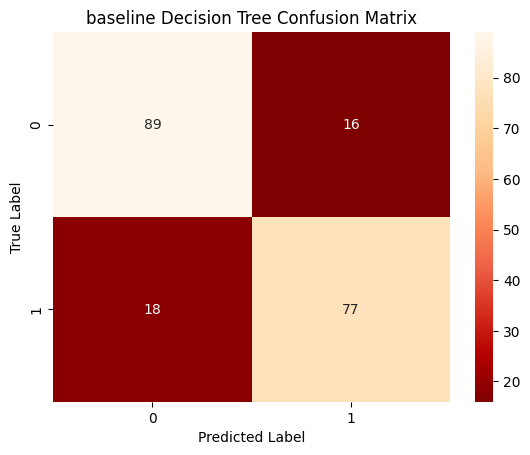



-----------------------------------------------------------------------------------------


baseline Bayesian Learning accuracy: 0.62
baseline Bayesian Learning roc_auc_score: 0.61
baseline Bayesian Learning cross_validation accuracy : 0.54
baseline Bayesian Learning clf_report:
               precision    recall  f1-score   support

           0       0.59      0.89      0.71       105
           1       0.72      0.33      0.45        95

    accuracy                           0.62       200
   macro avg       0.66      0.61      0.58       200
weighted avg       0.65      0.62      0.59       200

baseline Bayesian Learning confusion matrix:
 [[93 12]
 [64 31]]


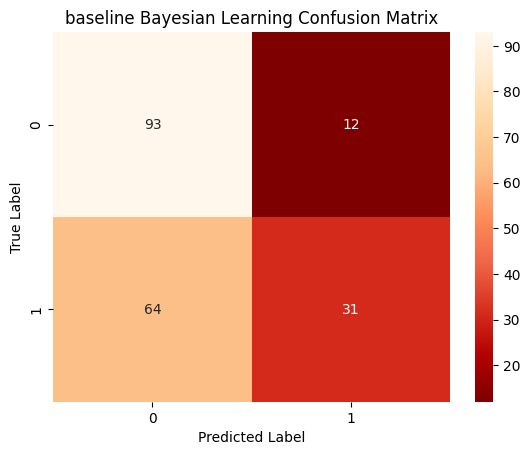



-----------------------------------------------------------------------------------------


baseline SVM accuracy: 0.73
baseline SVM roc_auc_score: 0.74
baseline SVM cross_validation accuracy : 0.68
baseline SVM clf_report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       105
           1       0.71      0.75      0.73        95

    accuracy                           0.73       200
   macro avg       0.73      0.74      0.73       200
weighted avg       0.74      0.73      0.74       200

baseline SVM confusion matrix:
 [[76 29]
 [24 71]]


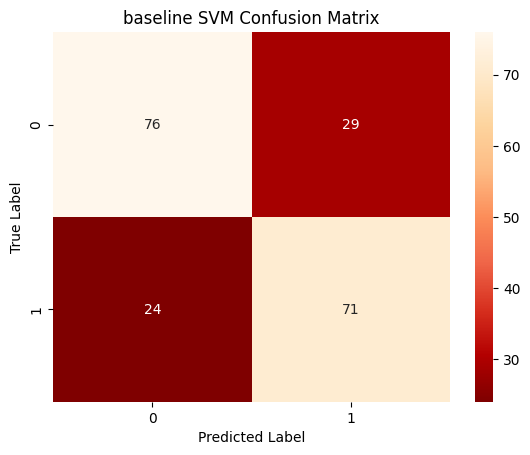



-----------------------------------------------------------------------------------------


baseline KNN accuracy: 0.66
baseline KNN roc_auc_score: 0.66
baseline KNN cross_validation accuracy : 0.59
baseline KNN clf_report:
               precision    recall  f1-score   support

           0       0.68      0.64      0.66       105
           1       0.63      0.67      0.65        95

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.65       200
weighted avg       0.66      0.66      0.66       200

baseline KNN confusion matrix:
 [[67 38]
 [31 64]]


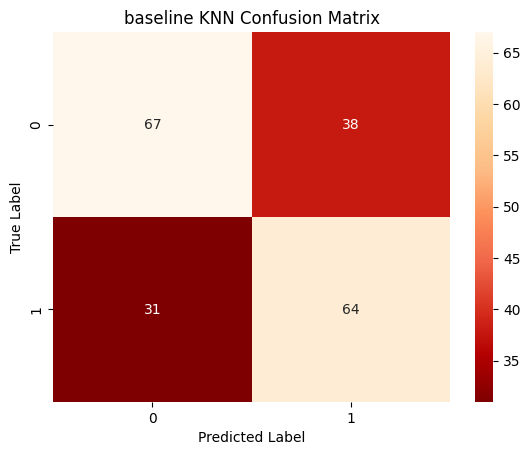



-----------------------------------------------------------------------------------------


  __  __           _      _        _____                                 _     _             
 |  \/  |         | |    | |      / ____|                               (_)   (_)            
 | \  / | ___   __| | ___| |___  | |     ___  _ __ ___  _ __   __ _ _ __ _ ___ _  ___  _ __  
 | |\/| |/ _ \ / _` |/ _ \ / __| | |    / _ \| '_ ` _ \| '_ \ / _` | '__| / __| |/ _ \| '_ \ 
 | |  | | (_) | (_| |  __/ \__ \ | |___| (_) | | | | | | |_) | (_| | |  | \__ \ | (_) | | | |
 |_|  |_|\___/ \__,_|\___|_|___/  \_____\___/|_| |_| |_| .__/ \__,_|_|  |_|___/_|\___/|_| |_|
                                                       | |                                   
                                                       |_|                                   


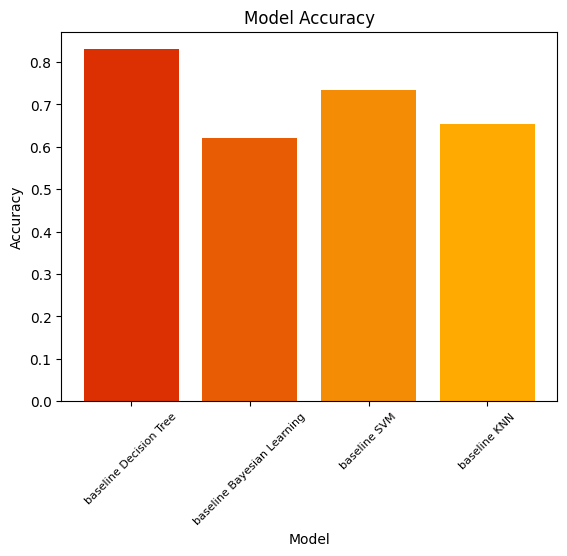




#########################################################################
  _      _____    _                       _        _   _             
 | |    |  __ \  (_)                     | |      | | (_)            
 | |    | |__) |  _ _ __ ___  _ __  _   _| |_ __ _| |_ _  ___  _ __  
 | |    |  _  /  | | '_ ` _ \| '_ \| | | | __/ _` | __| |/ _ \| '_ \ 
 | |____| | \ \  | | | | | | | |_) | |_| | || (_| | |_| | (_) | | | |
 |______|_|  \_\ |_|_| |_| |_| .__/ \__,_|\__\__,_|\__|_|\___/|_| |_|
                             | |                                     
                             |_|                                     
linear_regression_imputation Decision Tree accuracy: 0.86
linear_regression_imputation Decision Tree roc_auc_score: 0.86
linear_regression_imputation Decision Tree cross_validation accuracy : 0.85
linear_regression_imputation Decision Tree clf_report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       105
 

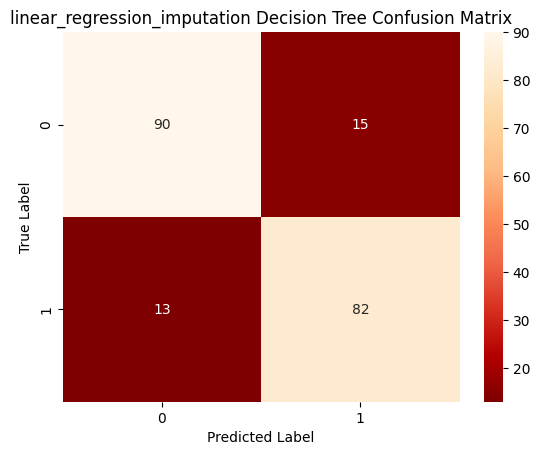



-----------------------------------------------------------------------------------------


linear_regression_imputation Bayesian Learning accuracy: 0.72
linear_regression_imputation Bayesian Learning roc_auc_score: 0.71
linear_regression_imputation Bayesian Learning cross_validation accuracy : 0.63
linear_regression_imputation Bayesian Learning clf_report:
               precision    recall  f1-score   support

           0       0.69      0.85      0.76       105
           1       0.77      0.58      0.66        95

    accuracy                           0.72       200
   macro avg       0.73      0.71      0.71       200
weighted avg       0.73      0.72      0.71       200

linear_regression_imputation Bayesian Learning confusion matrix:
 [[89 16]
 [40 55]]


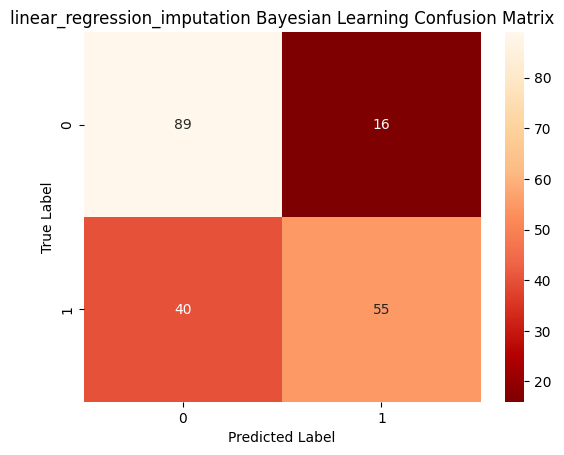



-----------------------------------------------------------------------------------------


linear_regression_imputation SVM accuracy: 0.77
linear_regression_imputation SVM roc_auc_score: 0.77
linear_regression_imputation SVM cross_validation accuracy : 0.72
linear_regression_imputation SVM clf_report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       105
           1       0.74      0.79      0.76        95

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.77       200

linear_regression_imputation SVM confusion matrix:
 [[78 27]
 [20 75]]


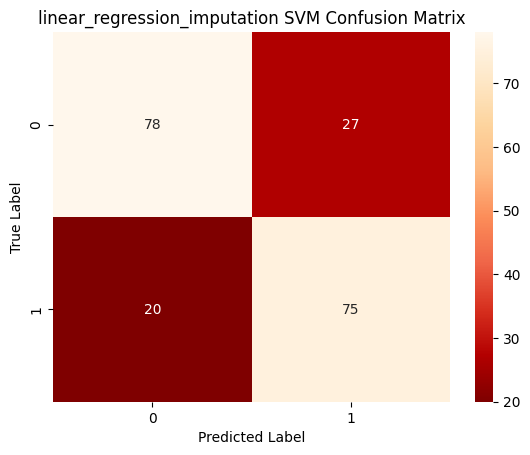



-----------------------------------------------------------------------------------------


linear_regression_imputation KNN accuracy: 0.70
linear_regression_imputation KNN roc_auc_score: 0.70
linear_regression_imputation KNN cross_validation accuracy : 0.64
linear_regression_imputation KNN clf_report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       105
           1       0.69      0.68      0.69        95

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200

linear_regression_imputation KNN confusion matrix:
 [[76 29]
 [30 65]]


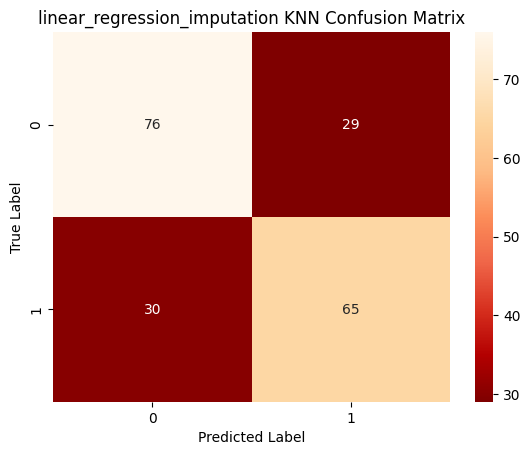



-----------------------------------------------------------------------------------------


  __  __           _      _        _____                                 _     _             
 |  \/  |         | |    | |      / ____|                               (_)   (_)            
 | \  / | ___   __| | ___| |___  | |     ___  _ __ ___  _ __   __ _ _ __ _ ___ _  ___  _ __  
 | |\/| |/ _ \ / _` |/ _ \ / __| | |    / _ \| '_ ` _ \| '_ \ / _` | '__| / __| |/ _ \| '_ \ 
 | |  | | (_) | (_| |  __/ \__ \ | |___| (_) | | | | | | |_) | (_| | |  | \__ \ | (_) | | | |
 |_|  |_|\___/ \__,_|\___|_|___/  \_____\___/|_| |_| |_| .__/ \__,_|_|  |_|___/_|\___/|_| |_|
                                                       | |                                   
                                                       |_|                                   


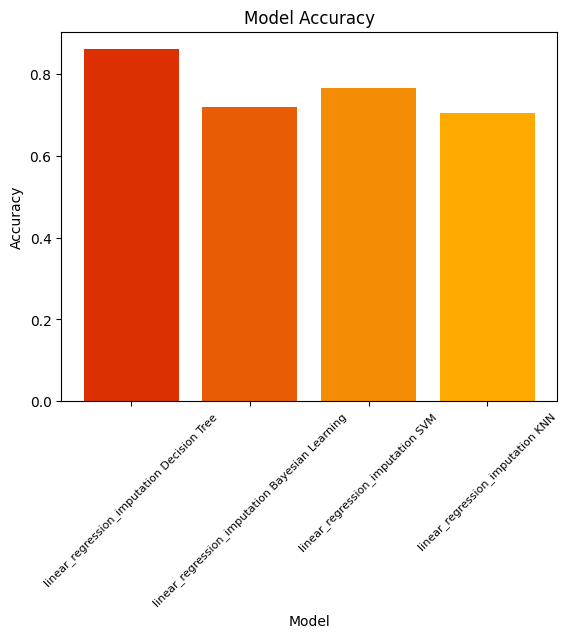




#########################################################################
  _  ___   _ _   _   _                       _        _   _             
 | |/ / \ | | \ | | (_)                     | |      | | (_)            
 | ' /|  \| |  \| |  _ _ __ ___  _ __  _   _| |_ __ _| |_ _  ___  _ __  
 |  < | . ` | . ` | | | '_ ` _ \| '_ \| | | | __/ _` | __| |/ _ \| '_ \ 
 | . \| |\  | |\  | | | | | | | | |_) | |_| | || (_| | |_| | (_) | | | |
 |_|\_\_| \_|_| \_| |_|_| |_| |_| .__/ \__,_|\__\__,_|\__|_|\___/|_| |_|
                                | |                                     
                                |_|                                     
knn_imputation Decision Tree accuracy: 0.88
knn_imputation Decision Tree roc_auc_score: 0.88
knn_imputation Decision Tree cross_validation accuracy : 0.83
knn_imputation Decision Tree clf_report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       105
           1       0.87      0.88

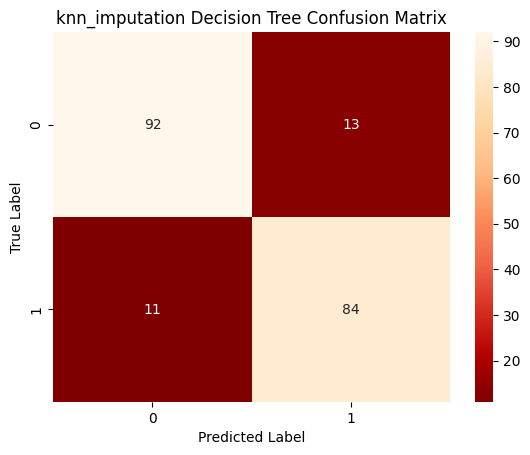



-----------------------------------------------------------------------------------------


knn_imputation Bayesian Learning accuracy: 0.70
knn_imputation Bayesian Learning roc_auc_score: 0.70
knn_imputation Bayesian Learning cross_validation accuracy : 0.63
knn_imputation Bayesian Learning clf_report:
               precision    recall  f1-score   support

           0       0.68      0.83      0.75       105
           1       0.75      0.57      0.65        95

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200

knn_imputation Bayesian Learning confusion matrix:
 [[87 18]
 [41 54]]


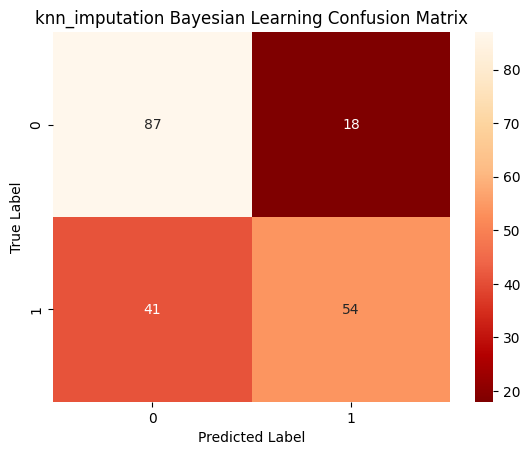



-----------------------------------------------------------------------------------------


knn_imputation SVM accuracy: 0.76
knn_imputation SVM roc_auc_score: 0.76
knn_imputation SVM cross_validation accuracy : 0.71
knn_imputation SVM clf_report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       105
           1       0.73      0.79      0.76        95

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200

knn_imputation SVM confusion matrix:
 [[77 28]
 [20 75]]


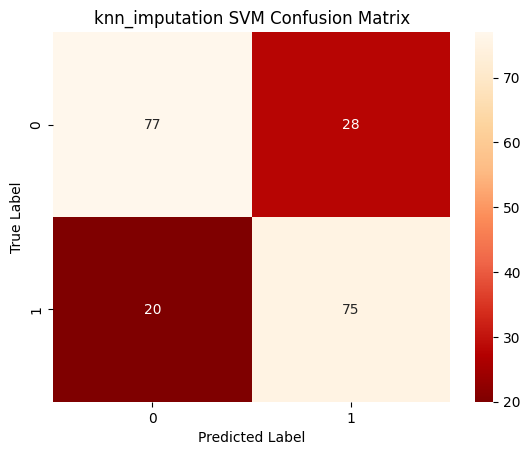



-----------------------------------------------------------------------------------------


knn_imputation KNN accuracy: 0.69
knn_imputation KNN roc_auc_score: 0.69
knn_imputation KNN cross_validation accuracy : 0.63
knn_imputation KNN clf_report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       105
           1       0.68      0.65      0.67        95

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200

knn_imputation KNN confusion matrix:
 [[76 29]
 [33 62]]


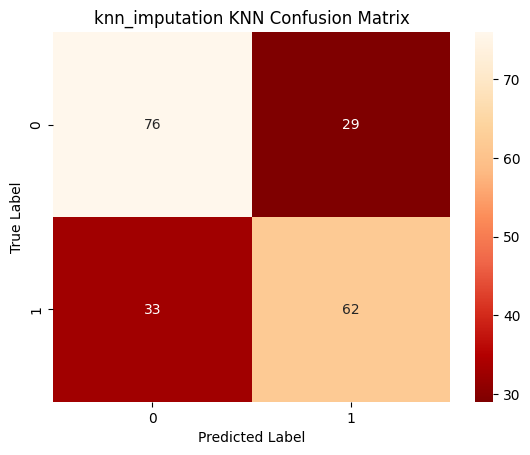



-----------------------------------------------------------------------------------------


  __  __           _      _        _____                                 _     _             
 |  \/  |         | |    | |      / ____|                               (_)   (_)            
 | \  / | ___   __| | ___| |___  | |     ___  _ __ ___  _ __   __ _ _ __ _ ___ _  ___  _ __  
 | |\/| |/ _ \ / _` |/ _ \ / __| | |    / _ \| '_ ` _ \| '_ \ / _` | '__| / __| |/ _ \| '_ \ 
 | |  | | (_) | (_| |  __/ \__ \ | |___| (_) | | | | | | |_) | (_| | |  | \__ \ | (_) | | | |
 |_|  |_|\___/ \__,_|\___|_|___/  \_____\___/|_| |_| |_| .__/ \__,_|_|  |_|___/_|\___/|_| |_|
                                                       | |                                   
                                                       |_|                                   


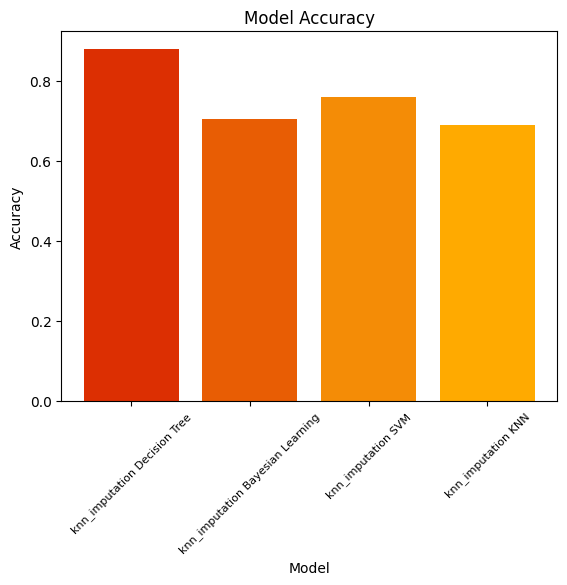


#########################################################################
           _ _   __  __           _      _        _____                                 _                 
     /\   | | | |  \/  |         | |    | |      / ____|                               (_)                
    /  \  | | | | \  / | ___   __| | ___| |___  | |     ___  _ __ ___  _ __   __ _ _ __ _ ___  ___  _ __  
   / /\ \ | | | | |\/| |/ _ \ / _` |/ _ \ / __| | |    / _ \| '_ ` _ \| '_ \ / _` | '__| / __|/ _ \| '_ \ 
  / ____ \| | | | |  | | (_) | (_| |  __/ \__ \ | |___| (_) | | | | | | |_) | (_| | |  | \__ \ (_) | | | |
 /_/    \_\_|_| |_|  |_|\___/ \__,_|\___|_|___/  \_____\___/|_| |_| |_| .__/ \__,_|_|  |_|___/\___/|_| |_|
                                                                      | |                                 
                                                                      |_|                                 


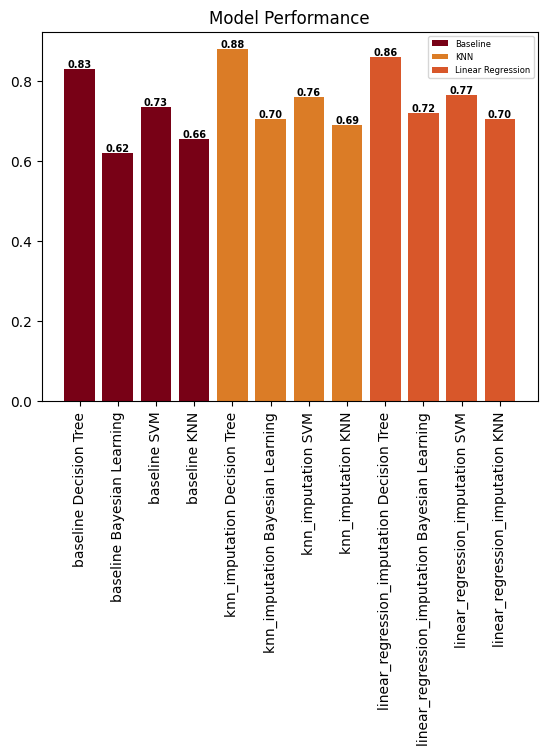


#########################################################################
    ____            __     __  ___          __     __    
   / __ )___  _____/ /_   /  |/  /___  ____/ /__  / /____
  / __  / _ \/ ___/ __/  / /|_/ / __ \/ __  / _ \/ / ___/
 / /_/ /  __(__  ) /_   / /  / / /_/ / /_/ /  __/ (__  ) 
/_____/\___/____/\__/  /_/  /_/\____/\__,_/\___/_/____/  
                                                         



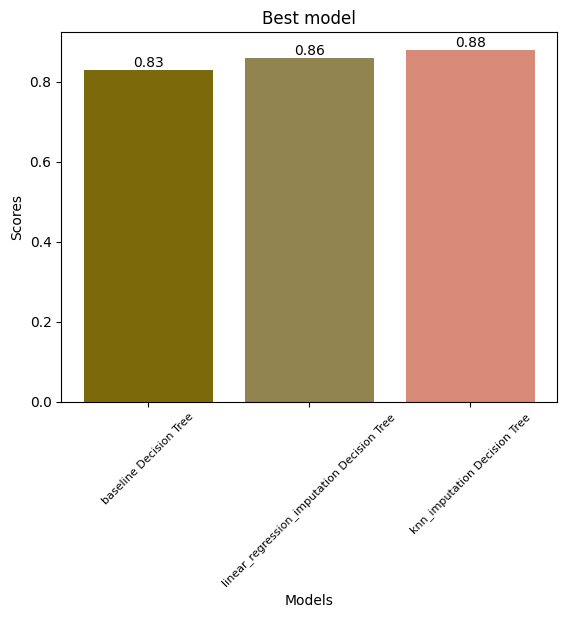

In [18]:
data = test_df

model_selector = ModelSelector(data)

data_preprocess_methods=['baseline', 'linear_regression_imputation' ,'knn_imputation']

all_model_report = {}
best_model_report = {}
all_best_algorithm_model={}

current_best_algorithm_model=None
gen = model_selector.print_ASCII_art()
for method in data_preprocess_methods:
    print("\n")
    next(gen)
    models_report, best_model_name, best_accuracy,best_model = model_selector.evaluate(method)
   
    all_model_report.update(models_report)
    best_model_report[best_accuracy] = best_model_name
    all_best_algorithm_model[best_accuracy] = best_model

model_selector.plot_report(all_model_report,best_model_report)
best_trained_model = model_selector.get_best_trained_model(all_best_algorithm_model)



# **Part B**

In [19]:
# Load the test data
new_test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
new_test_data = new_test_df.iloc[:,:-1].copy()


# Data pre-processing
imputer = KNNImputer(n_neighbors=3)
test_df = pd.read_csv('CE802_P2_Test.csv')
new_test_data['F20'] = pd.DataFrame(imputer.fit_transform(new_test_data['F20'].values.reshape(-1,1)))
iterative_scaler = StandardScaler()
scaled_data = iterative_scaler.fit_transform(new_test_data)
scaled_data

#prediction using best model
predicted = best_trained_model.predict(scaled_data) 

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = LabelEncoder().fit_transform(predicted).astype(bool) 

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])


In [20]:

# count the number of true and false values in each column
pos_count = predicted.sum()
neg_count = len(predicted) - pos_count

print("True count:\n", pos_count)
print("False count:\n", neg_count)

True count:
 466
False count:
 534


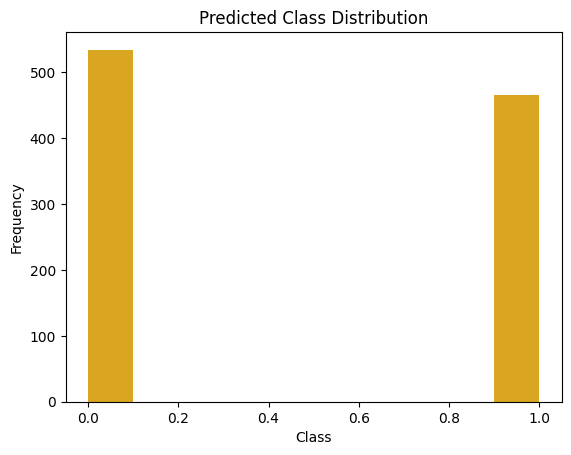

In [21]:


# Create a histogram of the predicted class distribution
plt.hist(predicted , color = 'goldenrod')
plt.title('Predicted Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()